In [1]:
import tspice
print(tspice.__version__)

/home/deivyastro/TSPICE_package/src/tspice/tidal_signal.py:4: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.5)
  import scipy.special as sps


0.0.1


In [2]:
#Initialize the kernels --> The first time takes a bit longer to download the kernels
tspice.initialize()

TSPICE initialized successfully. Kernels loaded from: /home/deivyastro/TSPICE_package/src/tspice/data/meta_kernel


In [3]:
earth = tspice.Body('Earth')

I'm using as example, the signal around (14 days before and after) the seismic event in Paratebueno, Colombia ($M_{w}=6.3$):

In [4]:
#Coordinates of the station in radians
loc = dict(lat = 4.49,
           lon = -73.14,
           depth = 9)

#Magnitude
#Mw = 6.3

#Dictionary with the start, stop, and step data
date = dict(start = '2025-05-25 13:08:05',
            stop = '2025-06-22 13:08:05',
            step = '1h',
            time_frame = 'UTC')

#List of bodies to consider for tidal calculations
bodylist = ['Moon', 'Sun', 'Mercury', 'Venus', 'Mars', 'Jupiter']

In [15]:
#Get the tidal potential due just to the Moon
tgp_one, et_utc = earth.tgp_one_body('Moon', loc_sta=loc, dates=date, nmax=6, time_array=True)

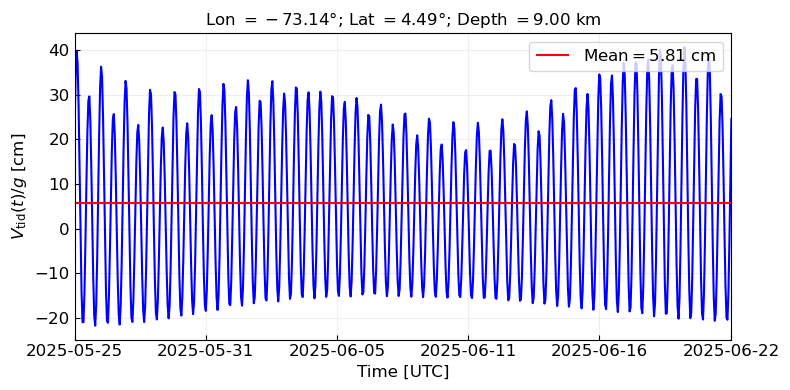

In [16]:
#Plotting the signal
tspice.plot_one_signal(et_utc, tgp_one*100, loc=loc, colors=['blue','red'], mean_value=True)

In [7]:
from datetime import datetime
import spiceypy as spy

In [12]:
#Convert ET to UTC
utc_times = tspice.utils.et_to_utc_string(et_utc)

In [17]:
#To get the total tidal signal due to all the bodies in the list
tgp_many = earth.tgp_many_bodies(bodylist, loc_sta=loc, dates=date, nmax=6, body_signal=False, time_array=False)

Moon contribution calculated!
Sun contribution calculated!
Mercury contribution calculated!
Venus contribution calculated!
Mars contribution calculated!
Jupiter contribution calculated!


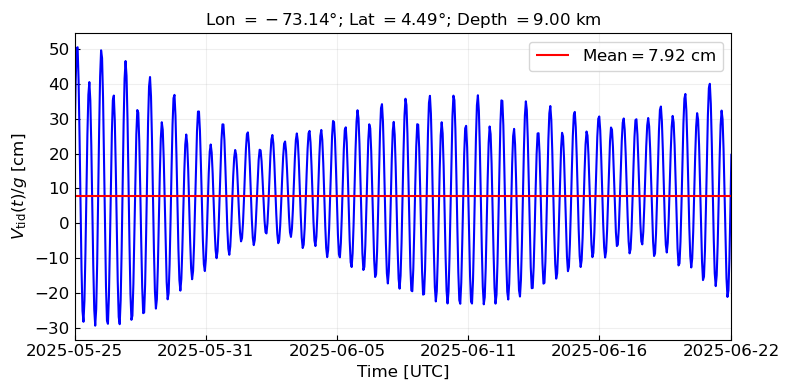

In [19]:
tspice.plot_one_signal(et_utc, tgp_many*100, loc=loc, colors=['blue','red'], mean_value=True)